In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tfn_backbone import TFNEigenNet
import jax
from jax.config import config
config.update('jax_platform_name', 'cpu')
import jax.numpy as jnp
import matplotlib.pyplot as plt

model = TFNEigenNet([1, 4, 4, 4], -50, 50)
key = jax.random.PRNGKey(1)
B = 3000
D = 3


x = jax.random.uniform(key, (B, 1, 3), minval=-D, maxval=D)
# x = coordinates
# L_inv = jax.random.uniform(key, (2, 2))
weights = model.init(key, x[0])

vmodel = jax.vmap(model.apply, in_axes=[None, 1])
out = vmodel(weights, x)
out.shape

{0: [(1, 4, 1)], 1: [(1, 4, 3)]}
(1, 4, 3)
{0: [(3000, 4, 1)], 1: [(3000, 4, 3)]}
(3000, 4, 3)


(1, 3000, 4, 3)

In [3]:
xs, ys, zs = x[:,1].T
xs.shape

(3000,)

In [4]:
# each of these lines is a different p-orbital
# cs = out[0,:,0,0]
# cs = out[0,:,0,1]
cs = out[0,:,0,2]

cs.shape

(3000,)

In [5]:
%matplotlib widget

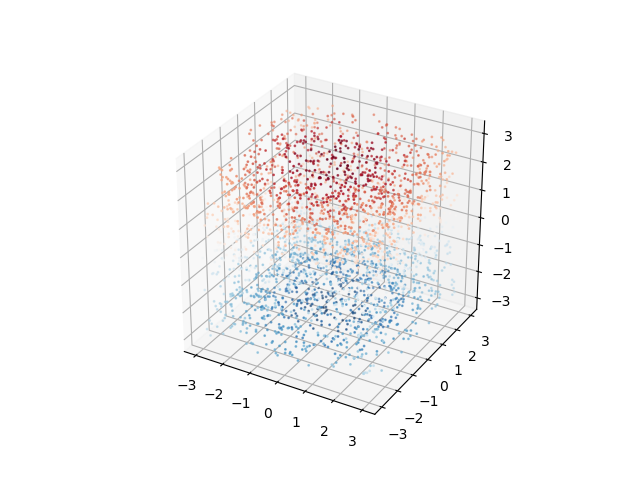

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])
ax.scatter(xs, ys, zs, s=1, c=cs, cmap='RdBu')